# Mass function
This notebook can be used to create figures of the halo mass function.

In [1]:
#Imports
import os
from classy import Class #Used for P(k)
from cluster_toolkit import massfunction
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import seaborn as sns#; sns.set()
%matplotlib inline
plt.rc("text", usetex=True) #Comment this if LaTeX not installed
plt.rc("font", size=16, family='serif')

z = 0

In [2]:
#For computing P(k), we need to define a cosmology
#Let's use Fox, which is a simulation that sits on disk at UA
Om = 0.318
h = 0.6704
Ob = 0.049
ns = 0.962
ln10As = 3.1
Ocdm = Om - Ob
if not os.path.isfile("plin_z%.1f.npy"%z):
    params = {
        'output': 'mPk',
        "h":h,
        "ln10^{10}A_s": ln10As,
        #"sigma8":0.835,
        "n_s":ns,
        "Omega_b":Ob,
        "Omega_cdm":Ocdm,
        'P_k_max_1/Mpc':1000.,
        'z_max_pk':1.0,}
        #'non linear':'halofit'}
    class_cosmo_object = Class()
    class_cosmo_object.set(params)
    class_cosmo_object.compute()
    print "sigma8 is:", class_cosmo_object.sigma8()
    #Calculate the linear matter power spectrum:
    k = np.logspace(-5, 3, base=10, num=4000) #1/Mpc
    kh = k/h #h/Mpc now
    Plin = np.array([class_cosmo_object.pk_lin(ki, z) for ki in k])*h*h*h
    np.save("k", kh) 
    np.save("plin_z%.1f"%z, Plin)
k = np.load("k.npy")
Plin = np.load("plin_z%.1f.npy"%z)

In [3]:
#Compute the halo mass function
M = np.logspace(12, 15.5, 100) #Msun/h
dndM = massfunction.dndM_at_M(M, k, Plin, Om)

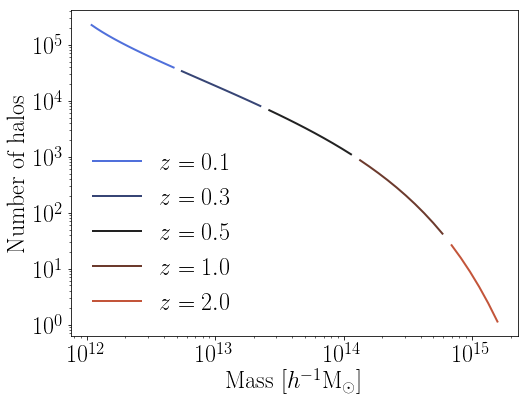

In [21]:
#Make the plot of the number of halos in a 1 Gpc/h cube
Volume = 1050.**3*h**3 #Gpc
dNdM = dndM*Volume
bins = np.logspace(12, 15.5, 50)
N = massfunction.n_in_bins(bins, M, dNdM)
Mi = (bins[:1]+bins[1:])/2

edges = np.logspace(12, 15.5, 6)
zs = [0.1, 0.3, 0.5, 1.0, 2.0]
cmap = sns.diverging_palette(260, 20, sep=20, as_cmap=True, center="dark")
cs = [cmap(ci) for ci in np.linspace(0,1,len(zs))]
plt.rc("font", size=24, family='serif')
fig = plt.figure(figsize=(8,6))
for i in range(len(edges)-1):
    #inds = (M>=edges[i])*(M<edges[i+1])
    #plt.loglog(M[inds], dNdM[inds], c=cs[i], label=r"$z=%.1f$"%zs[i])
    inds = (Mi>=edges[i])*(Mi<edges[i+1])
    plt.loglog(Mi[inds], N[inds], c=cs[i], label=r"$z=%.1f$"%zs[i], lw=2)

plt.legend(loc=0, frameon=False)
plt.xlabel(r"Mass $[h^{-1}{\rm M_\odot}]$")
plt.ylabel(r"Number of halos")
#plt.title("Formation age")
plt.savefig("figure1.png", dpi=400, bbox_inches='tight')